In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D, Dense, Conv2D, Input, Flatten, Dropout, RandomRotation, RandomZoom

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
train=pd.read_csv("/content/sample_data/mnist_train_small.csv")
test=pd.read_csv("/content/sample_data/mnist_test.csv")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train=train.iloc[:,0]
X_train=train.iloc[:,1:]

In [ ]:
X_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

In [ ]:
X_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape

(19999, 784)

In [ ]:
y_train.shape

(19999,)

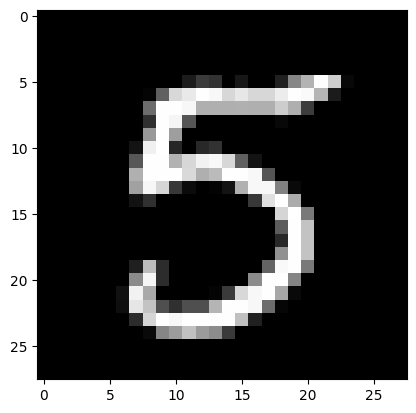

In [ ]:
plt.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.gray)

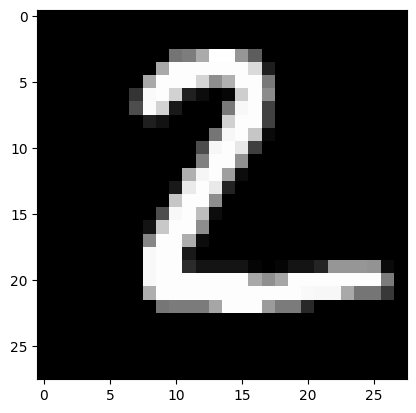

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.gray)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")

In [ ]:
print(X_train.shape,X_test.shape)

(19999, 28, 28, 1) (9999, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from tensorflow.keras.layers import Rescaling

In [ ]:
model=Sequential([
    Input(shape=(28,28,1)),
    Rescaling(1.0/255),

    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2),

    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,658 (842.41 KB)

 Trainable params: 215,658 (842.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train, batch_size=128, validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.7100 - loss: 0.9792 - val_accuracy: 0.9620 - val_loss: 0.1268
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.9529 - loss: 0.1505 - val_accuracy: 0.9748 - val_loss: 0.0790
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.9738 - loss: 0.0878 - val_accuracy: 0.9809 - val_loss: 0.0621
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9766 - loss: 0.0736 - val_accuracy: 0.9835 - val_loss: 0.0507
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9819 - loss: 0.0564 - val_accuracy: 0.9849 - val_loss: 0.0488
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.9867 - loss: 0.0450 - val_accuracy: 0.9823 - val_loss: 0.0531
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9870 - loss: 0.0420 - val_accuracy: 0.9869 - val_loss: 0.0399
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9900 - loss: 0.0324 - 

In [ ]:
loss,acc=model.evaluate(X_test,y_test)
print(acc,loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9816 - loss: 0.0635
0.98609858751297 0.04813171550631523


In [ ]:
train_acc=history.history['accuracy']
val_acc=history.history["val_accuracy"]

Text(0.5, 1.0, 'Training and validation accuracy')

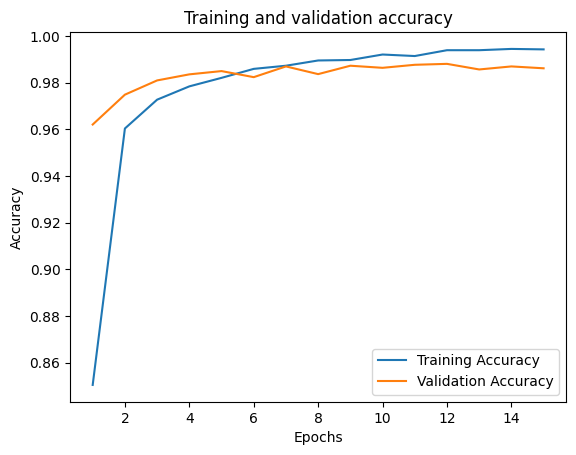

In [ ]:
plt.plot(range(1,len(train_acc)+1), train_acc,label='Training Accuracy')
plt.plot(range(1,len(val_acc)+1), val_acc,label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and validation accuracy")

In [ ]:
train_loss=history.history['loss']
val_loss=history.history["val_loss"]

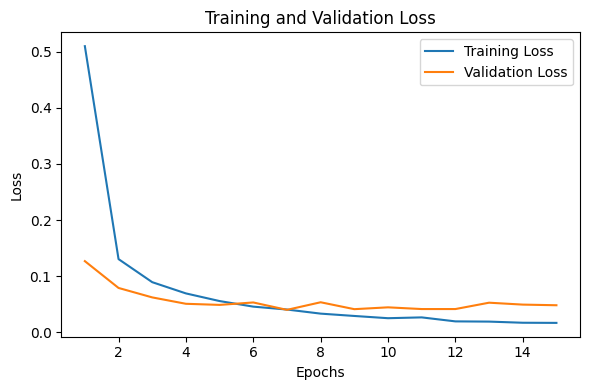

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and Validation Loss")
plt.tight_layout()
plt.show()

In [ ]:
model_with_aug=Sequential([
    Input(shape=(28,28,1)),
    RandomRotation(0.1, fill_mode='nearest'),
    RandomZoom(0.1, fill_mode='nearest'),
    Rescaling(1.0/255),

    Conv2D(16,(3,3), activation='relu'),
    MaxPool2D(2,2),

    Conv2D(64,(3,3), activation='relu'),
    MaxPool2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [ ]:
model_with_aug.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_rotation                 │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,658 (842.41 KB)

 Trainable params: 215,658 (842.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_with_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_aug=model_with_aug.fit(X_train,y_train, batch_size=128, validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.6027 - loss: 1.2359 - val_accuracy: 0.9441 - val_loss: 0.1717
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9096 - loss: 0.2905 - val_accuracy: 0.9665 - val_loss: 0.1054
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.9351 - loss: 0.2109 - val_accuracy: 0.9719 - val_loss: 0.0846
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9490 - loss: 0.1728 - val_accuracy: 0.9764 - val_loss: 0.0722
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.9519 - loss: 0.1503 - val_accuracy: 0.9791 - val_loss: 0.0688
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9612 - loss: 0.1258 - val_accuracy: 0.9794 - val_loss: 0.0623
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9591 - loss: 0.1273 - val_accuracy: 0.9827 - val_loss: 0.0563
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.9672 - loss: 0.1038 - 

In [ ]:
loss,acc=model_with_aug.evaluate(X_test,y_test)
print(acc,loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9861 - loss: 0.0491
0.9876987934112549 0.04125794768333435


In [ ]:
train_acc=history_aug.history['accuracy']
val_acc=history_aug.history["val_accuracy"]

Text(0.5, 1.0, 'Training and validation accuracy with augmentation')

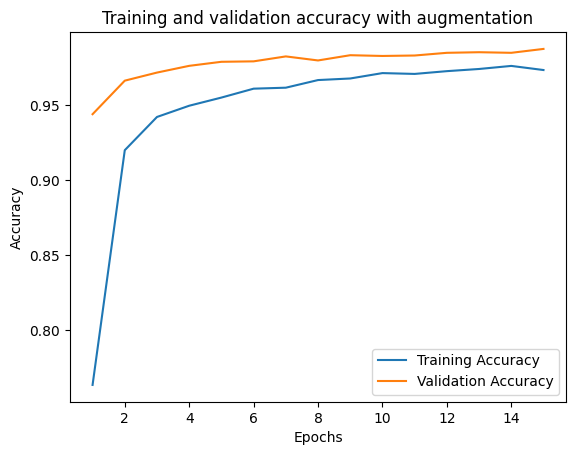

In [ ]:
plt.plot(range(1,len(train_acc)+1), train_acc,label='Training Accuracy')
plt.plot(range(1,len(val_acc)+1), val_acc,label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and validation accuracy with augmentation")

In [ ]:
train_loss=history_aug.history['loss']
val_loss=history_aug.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss with augmentation')

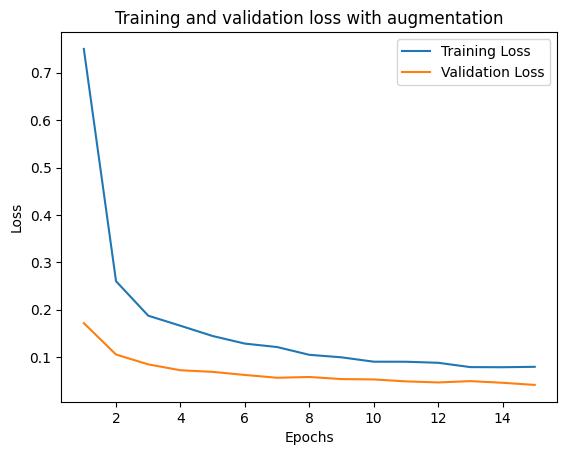

In [ ]:
plt.plot(range(1,len(train_loss)+1), train_loss,label='Training Loss')
plt.plot(range(1,len(val_loss)+1), val_loss,label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and validation loss with augmentation")

In [ ]:
model.save("digit_classifier.keras")

In [ ]:
import cv2

In [ ]:
def prepocess_image(path):
  img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  img=cv2.resize(img,(28,28))
  img=img.astype("float32")/255.0
  img=img.reshape(1,28,28,1).astype("float32")
  return img

In [ ]:
path='/content/2.jpg'
processed=prepocess_image(path)

In [ ]:
pred=model.predict(processed)
predicted_class=np.argmax(pred[0])
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1


In [ ]:
pred #1

array([[0.10359941, 0.13718794, 0.10833492, 0.08973712, 0.09002876,
        0.10147084, 0.09321408, 0.10638555, 0.08305356, 0.0869879 ]],
      dtype=float32)

In [ ]:
pred #2()

array([[0.10282645, 0.138286  , 0.10887531, 0.08982076, 0.0892522 ,
        0.10203622, 0.09230369, 0.10748363, 0.08239762, 0.0867181 ]],
      dtype=float32)

In [ ]:
pred_aug=model_with_aug.predict(processed)
predicted_class_aug=np.argmax(pred_aug[0])
print(predicted_class_aug)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3


In [ ]:
pred

array([[0.10282645, 0.138286  , 0.10887531, 0.08982076, 0.0892522 ,
        0.10203622, 0.09230369, 0.10748363, 0.08239762, 0.0867181 ]],
      dtype=float32)